# Import bibliotek

In [2]:
import os
import shutil
import librosa
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf
from PIL import Image

Do zbudowania naszego zbioru danych wykorzystamy trzy zbiory:
*  KAUH
*  ICBHI
*  Covid-19

In [3]:
# ścieżki do katalogów z danymi
RAW_DATA_PATH = "./Raw_datasets/"
KAUH_DATA_PATH = f"./{RAW_DATA_PATH}/KAUH_Lung_files"
ICBHI_DATA_PATH = f"./{RAW_DATA_PATH}/Respiratory_Sound_Database"
VIRUFY_DATA_PATH = f"./{RAW_DATA_PATH}/covid-19_dataset"

In [4]:
# Sprawdzanie poprawności ścieżek folderów
print("RAW DATA: ", os.path.exists(RAW_DATA_PATH))
print("KAUH: ", os.path.exists(KAUH_DATA_PATH))
print("ICBHI: ", os.path.exists(ICBHI_DATA_PATH))
print("VIRUFY: ", os.path.exists(VIRUFY_DATA_PATH))

RAW DATA:  True
KAUH:  True
ICBHI:  True
VIRUFY:  True


# Przetwarzanie zbioru ICBHI

### Wczytanie danych o chorobach pacjentów

In [5]:
patient_diseases_info = pd.read_csv(f'./{ICBHI_DATA_PATH}/patient_diagnosis.csv')
patient_diseases_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PatientID  126 non-null    int64 
 1   Diagnosis  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [6]:
unique_diseases_icbhi = patient_diseases_info['Diagnosis'].unique()
unique_diseases_icbhi = sorted(unique_diseases_icbhi)
print(f'Unikalne nazwy chorób płucnych: {unique_diseases_icbhi}')

Unikalne nazwy chorób płucnych: ['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'LRTI', 'Pneumonia', 'URTI']


                Ilość pacjentów:
Diagnosis                       
COPD                          64
Healthy                       26
URTI                          14
Bronchiectasis                 7
Bronchiolitis                  6
Pneumonia                      6
LRTI                           2
Asthma                         1


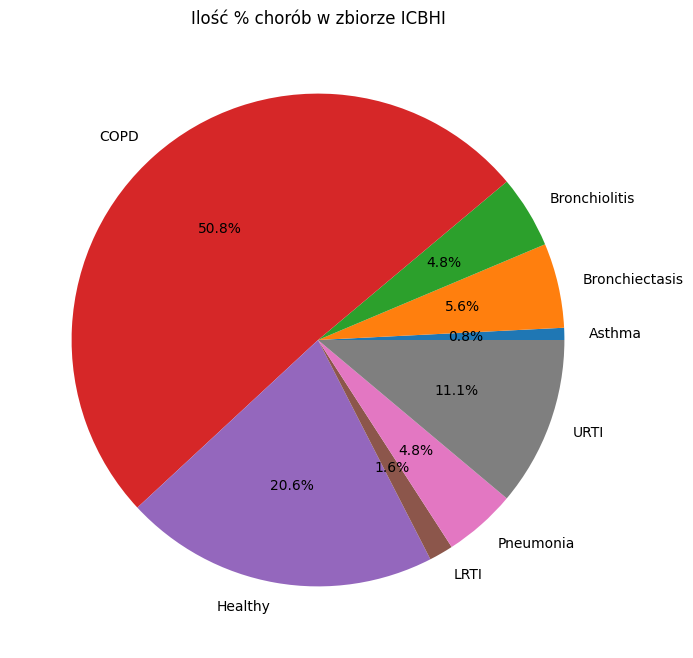

In [19]:
number_of_diseases = patient_diseases_info.groupby(['Diagnosis']).count()
print(number_of_diseases.sort_values(by=['PatientID'],ascending=False).rename(columns = {'PatientID':'Ilość pacjentów:'}))
plt.figure(figsize=(10,8))
plt.pie(number_of_diseases['PatientID'],labels=number_of_diseases.index,autopct='%1.1f%%')
plt.title("Ilość % chorób w zbiorze ICBHI")
plt.show()

### Segregacja plików audio ze względu na choroby 

In [20]:
#Tworzenie głównego folderu z danymi
if not os.path.exists('./data'):
    print("TWORZENIE KATALOGU GŁÓWNEGO")
    os.mkdir("./data")

#Tworzenie folderu dla audio
if not os.path.exists('./data/audio'):
    print("TWORZENIE KATALOGU DLA AUDIO")
    os.mkdir("./data/audio")

#Tworzenie podfolderów audio
for diseas in unique_diseases_icbhi:
    if not os.path.exists(f"./data/audio/{diseas}"):
        print(f"TWORZENIE PODKATALOGU DLA AUDIO CHOROB : {diseas}")
        os.mkdir(f"./data/audio/{diseas}")


In [21]:
#Segregacja plików audio ze względu na choroby
for diseas in unique_diseases_icbhi:
    print(f'CHOROBA {diseas}')

    #Szukanie po chorobie
    patient_list = patient_diseases_info[patient_diseases_info['Diagnosis'] == diseas]
    print(patient_list)
    
    for patient_id in patient_list['PatientID']:
        patient_files = glob.glob(f'{ICBHI_DATA_PATH}/audio_and_txt_files/{patient_id}*.wav')

        print(f'Pliki pacjenta: {patient_files}')

        for patient_file in patient_files:
            print("KOPIOWANIE: ",patient_file)
            shutil.copy(patient_file, f'./data/audio/{diseas}')

print("Pliki zostały posegregowane...")


CHOROBA Asthma
   PatientID Diagnosis
2        103    Asthma
Pliki pacjenta: ['././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\\103_2b2_Ar_mc_LittC2SE.wav']
KOPIOWANIE:  ././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\103_2b2_Ar_mc_LittC2SE.wav
CHOROBA Bronchiectasis
     PatientID       Diagnosis
10         111  Bronchiectasis
15         116  Bronchiectasis
67         168  Bronchiectasis
68         169  Bronchiectasis
95         196  Bronchiectasis
100        201  Bronchiectasis
114        215  Bronchiectasis
Pliki pacjenta: ['././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\\111_1b2_Tc_sc_Meditron.wav', '././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\\111_1b3_Tc_sc_Meditron.wav']
KOPIOWANIE:  ././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\111_1b2_Tc_sc_Meditron.wav
KOPIOWANIE:  ././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\111_1b3_Tc_sc_Meditron.wav
Pliki pacjenta: ['././Raw_datas

In [22]:
#Tworzenie folderu dla spectogramów
if not os.path.exists('./data/spectograms'):
    print("TWORZENIE KATALOGU DLA SPEKTOGRAMÓW")
    os.mkdir("./data/spectograms")

#Tworzenie podfolderów spectogramów
for diseas in unique_diseases_icbhi:
    if not os.path.exists(f"./data/spectograms/{diseas}"):
        print(f"TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : {diseas}")
        os.mkdir(f"./data/spectograms/{diseas}")

# Etapy tworzenia spektogramów dla pliku audio

In [23]:
audio_files = glob.glob('../lung_diseases_detection/data/audio/*/*.wav')
audio_files[1]

'../lung_diseases_detection/data/audio\\Bronchiectasis\\111_1b2_Tc_sc_Meditron.wav'

In [ ]:
# Plik audio
ipd.Audio(audio_files[1])

In [ ]:
# Wczytanie pliku
wave, sr = librosa.load(audio_files[1])

print(f'Wave: {wave[:10]}')
print(f'shape Wave: {wave.shape}')
print(f'SAMPLE RATE: {sr}')

In [ ]:
#Surowy przebieg pliku
pd.Series(wave).plot(figsize=(10, 5),
                  lw=1,
                  title='Przebieg dźwięku')
plt.ylabel('Amplituda')
plt.xlabel('Czas')
plt.show()


In [ ]:
# Korekta ciszy dźwięku w audio
wave_trimmed, _ = librosa.effects.trim(wave, top_db=40)
pd.Series(wave_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Korekta ciszy w dźwięku')
plt.ylabel('Amplituda')
plt.xlabel('Czas')
plt.show()

In [ ]:
# Przybliżony przebieg dźwięku
pd.Series(wave[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Przybliżony przebieg dźwięku')
plt.ylabel('Amplituda')
plt.xlabel('Czas')
plt.show()

In [ ]:
# Tranformata Fouriera
D = librosa.stft(wave)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape


In [ ]:
# Spektogram z dźwięku
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram przykład', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f db')
plt.show()

In [ ]:
# Tworzenie spektogramu mel
mel_spec = librosa.feature.melspectrogram(y=wave,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(mel_spec, ref=np.max)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
# Spektogram mel
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram przykład', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Tworzenie dataset'u

In [ ]:
SAMPLE_RATE = 24000
CHUNK_LENGTH = 3

In [ ]:
def save_spectogram(spectogram,class_name,file, index = 0):
    file_name = file[:-4]
    #print(file_name)

    #Zapis spektogramu
    saved_path = os.path.join(f'./data/spectograms/{class_name}/{file_name}_{index}.png')
    print(saved_path)

    image = Image.fromarray(spectogram * 255).convert("L")
    image.save(saved_path)

In [ ]:
def get_mel_spectograms(filepath,sample_rate=22000,image_shape=(224,224)):
    #Wczytanie pliku audio
    wave, rate = librosa.load(path = filepath, sr = sample_rate)

    #Podział dźwięku na odcinki
    signal_splits = []

    for i in range(0,len(wave),int(CHUNK_LENGTH * SAMPLE_RATE)):
        chunk = wave[i:i + int(CHUNK_LENGTH * SAMPLE_RATE)]

        if len(chunk) < int(CHUNK_LENGTH * SAMPLE_RATE):
            break
        
        signal_splits.append(chunk)

    #Tworzenie mel spektogramu dla kazdego z odcinka
    ready_mel_spectograms = []

    for chunk in signal_splits:

        mel_spectogram = librosa.feature.melspectrogram(y = chunk,
                                                        sr = rate,
                                                        n_fft = 1024,
                                                        hop_length = 512,
                                                        n_mels = image_shape[0] * 1,
                                                        fmin = 100,
                                                        fmax = 24000)
        
        mel_spectogram = librosa.amplitude_to_db(mel_spectogram, ref = np.max)
        #Normalizacja
        mel_spectogram -= mel_spectogram.min()
        mel_spectogram /= mel_spectogram.max()

        #Dodanie melspektogramu do listy
        ready_mel_spectograms.append(mel_spectogram)

    return np.array(ready_mel_spectograms)

In [ ]:
def prepare_spectograms():

    class_names = os.listdir('./data/audio')
    print(f"Nazwy klas: {class_names}")

    for class_name in class_names:
        files_disease = os.listdir(f'./data/audio/{class_name}')

        for file in files_disease:
            print(f"{class_name} - > {file}")

            mel_spectograms = get_mel_spectograms(f'./data/audio/{class_name}/{file}', sample_rate = SAMPLE_RATE)

            
            #Zapis spektogramów
            for idx, spec in enumerate(mel_spectograms):
                save_spectogram(spectogram = spec, class_name = class_name, file = file,index = idx)            
            

    print("SPEKTOGRAMY ZOSTAŁY PRZYGOTOWANE...")

In [ ]:
test = get_mel_spectograms('./data/audio/Bronchiectasis/111_1b2_Tc_sc_Meditron.wav')

fig, ax = plt.subplots(figsize=(10, 5))
# Spektogram mel
img = librosa.display.specshow(test[0],
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Przygotowanie spektogramów z plików audio

In [ ]:
prepare_spectograms()

 # Przygotowanie danych ze zbioru KAUH

In [7]:
kauh_dataset = pd.read_excel(f'{KAUH_DATA_PATH}/Data annotation.xlsx',usecols=range(5))
kauh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         112 non-null    int64 
 1   Gender      112 non-null    object
 2   Location    112 non-null    object
 3   Sound type  112 non-null    object
 4   Diagnosis   112 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.5+ KB


In [10]:
unique_diseases_kauh = kauh_dataset['Diagnosis'].unique()

print(unique_diseases_kauh)

['Asthma' 'Heart Failure + Lung Fibrosis ' 'Heart Failure + COPD'
 'Plueral Effusion' 'Heart Failure' 'heart failure' 'COPD' 'pneumonia'
 'Asthma and lung fibrosis' 'BRON' 'Lung Fibrosis' 'copd' 'asthma' 'N']


In [20]:
diseases_kauh_count = kauh_dataset.groupby('Diagnosis').count()
print(diseases_kauh_count['Age'].sort_values(ascending=False))

Diagnosis
N                                 35
Asthma                            17
asthma                            15
heart failure                     15
COPD                               8
pneumonia                          5
Lung Fibrosis                      4
BRON                               3
Heart Failure                      3
Heart Failure + COPD               2
Plueral Effusion                   2
Asthma and lung fibrosis           1
Heart Failure + Lung Fibrosis      1
copd                               1
Name: Age, dtype: int64


## Segregowanie danych

In [39]:
kauh_disease_dir = {'Asthma': ['Asthma','Asthma and lung fibrosis','asthma'],
                    'Bronchiectasis' : ['BRON'],
                    'COPD': ['COPD','copd'],
                    'Heart_Failure': ['heart failure','Heart Failure','Heart Failure + COPD'],
                    'Healthy': ['N'],
                    'Pneumonia' : ['pneumonia']}

kauh_disease_file_list = {'Asthma': [],
                        'Bronchiectasis' : [],
                        'COPD': [],
                        'Heart_Failure': [],
                        'Healthy': [],
                        'Pneumonia' : []}

In [44]:
import re

kauh_files = os.listdir(f'{KAUH_DATA_PATH}/Audio Files/')

#print(kauh_files)

for key_category, diseases_list in kauh_disease_dir.items():
    print(f'Category -> {key_category}')

    for disease in diseases_list:
        print(f'\t -> : {disease}')

        #Segregowanie plików audio ze względu na nazwy
        find_names = []
        
        for file in kauh_files:
            is_find = re.search(f"_{disease},",file)

            if is_find != None:
                print(f' --> {file}')
                kauh_disease_file_list[key_category].append(file)

#for key_category, diseases_list in kauh_disease_file_list.items():
#   print(diseases_list)

Category -> Asthma
	 -> : Asthma
 --> BP101_Asthma,E W,P L M,12,F.wav
 --> BP104_Asthma,E W,P L U,45,F.wav
 --> BP106_Asthma,E W,P L U,45,F.wav
 --> BP107_Asthma,E W,P L U,59,F.wav
 --> BP10_Asthma,E W,P R U,59,M.wav
 --> BP12_Asthma,E W,P L L,50,F.wav
 --> BP15_Asthma,E W,P R U,49,F.wav
 --> BP1_Asthma,I E W,P L L,70,M.wav
 --> BP2_Asthma,E W,P L L R,52,F.wav
 --> BP33_Asthma,E W,P R M,43,F.wav
 --> BP35_Asthma,E W,A R L,38,M.wav
 --> BP38_Asthma,E W,P R M,38,M.wav
 --> BP3_Asthma,I E W,P L L R,50,F.wav
 --> BP77_Asthma,E W,A R L,40,M.wav
 --> BP78_Asthma,E W,P R M,20,M.wav
 --> BP97_Asthma,E W,P R U,24,M.wav
 --> BP9_Asthma,E W,P R L ,59,M.wav
 --> DP101_Asthma,E W,P L M,12,F.wav
 --> DP104_Asthma,E W,P L U,45,F.wav
 --> DP106_Asthma,E W,P L U,45,F.wav
 --> DP107_Asthma,E W,P L U,59,F.wav
 --> DP10_Asthma,E W,P R U,59,M.wav
 --> DP12_Asthma,E W,P L L,50,F.wav
 --> DP15_Asthma,E W,P R U,49,F.wav
 --> DP1_Asthma,I E W,P L L,70,M.wav
 --> DP2_Asthma,E W,P L L R,52,F.wav
 --> DP33_Asthma

## Tworzenie dataset'u

In [25]:
print(unique_diseases_icbhi)

['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'LRTI', 'Pneumonia', 'URTI']
